In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Image Enhancement III: Sharpening

In this task, we will implement unsharp masking in two different forms:
1. Using laplacian as mentioned in lecture notes, i.e. $\dot{f} = \nabla^2 f$
2. Using difference of original and blurred images, i.e. $\dot{f} = f - f_{blur}$

Unsharp masking:
$$
f = f + A\dot{f}
$$

In [48]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-mx8zf1w6
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=1e4245b443b3b8aadb5d69a403dce2c86cd68cad9b292a328c9abd57af51bda7
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_gnz1fd/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-mx8zf1w6


In [49]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=3) # download data for this assignment

Download Complete!


In [50]:
def unsharp_laplacian(img, laplacian_operator, A=1):
    '''
    Write a program to implement unsharp masking based on laplacian operator.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + laplacian_operator - a 3 x 3 laplacian operator, refer to slides.
    + A - strength parameter of unsharp masking
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    filter_img = cv2.medianBlur(img, 3)  # For removing noises from the image
    img_derivative = cv2.filter2D(filter_img, -1, laplacian_operator)
    out_img = filter_img + A * img_derivative
    out_img = np.clip(out_img, 0, 255).astype(np.uint8) # clipping values to get appropriate results
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [51]:
def unsharp_blur(img, blur_kernel=5, A=1):
    '''
    Write a program to implement unsharp masking based on difference of original and blurred image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + A - strength parameter of unsharp masking
    + blur_kernel - kernel size for gaussian blur operation. 
                    For gaussian kernel use sigma = nearest integer to (blur_kernel/5)
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.GaussianBlur to perform blur operations
    
    Hint:
    + 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    filter_img = cv2.medianBlur(img, 3) # For removing noise from the images
    img_blur = cv2.GaussianBlur(filter_img, (blur_kernel, blur_kernel), np.round(blur_kernel/5), 0)
    img_derivative = filter_img - img_blur
    out_img = filter_img + A * img_derivative
    
    #############################
    # End your code here ########
    #############################    
    
    return np.uint8(out_img)

### Test

---

In [52]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

car = cv2.imread('data/car_wiki.png', 0)
moon = cv2.imread('data/moon.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#    Car | A: -2
-------------------------------------


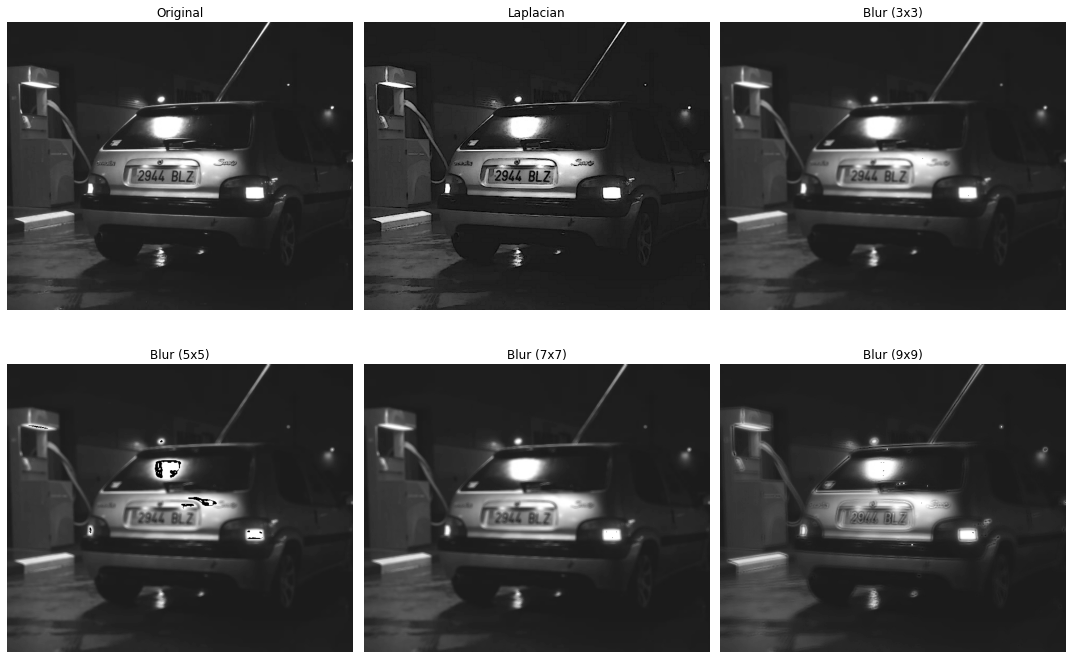


-------------------------------------
#    Car | A: -1
-------------------------------------


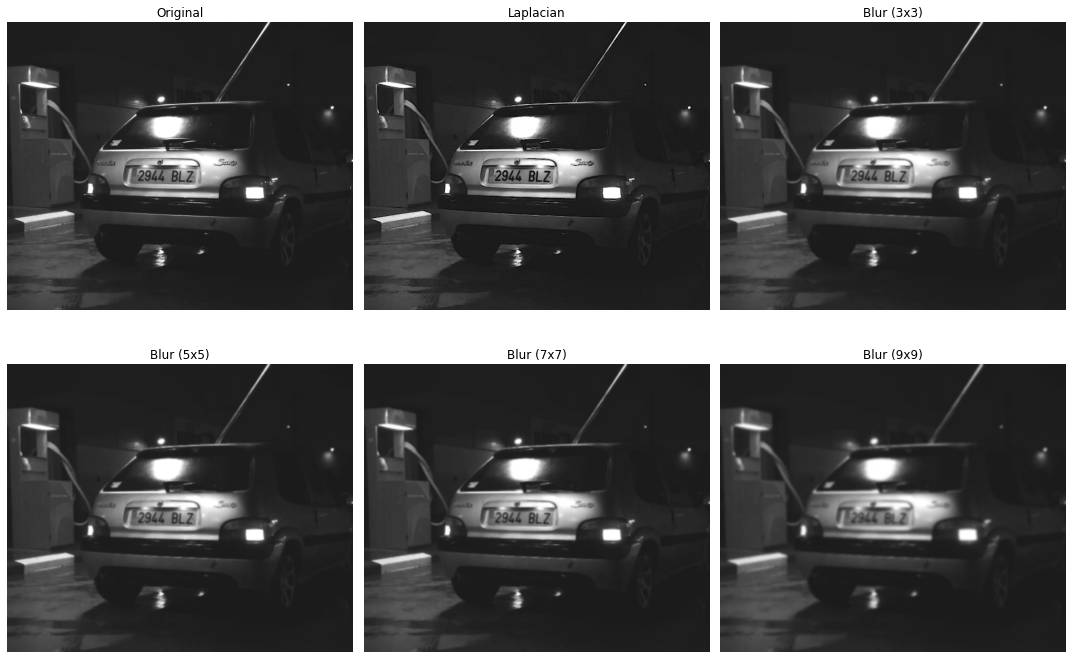


-------------------------------------
#    Car | A: 1
-------------------------------------


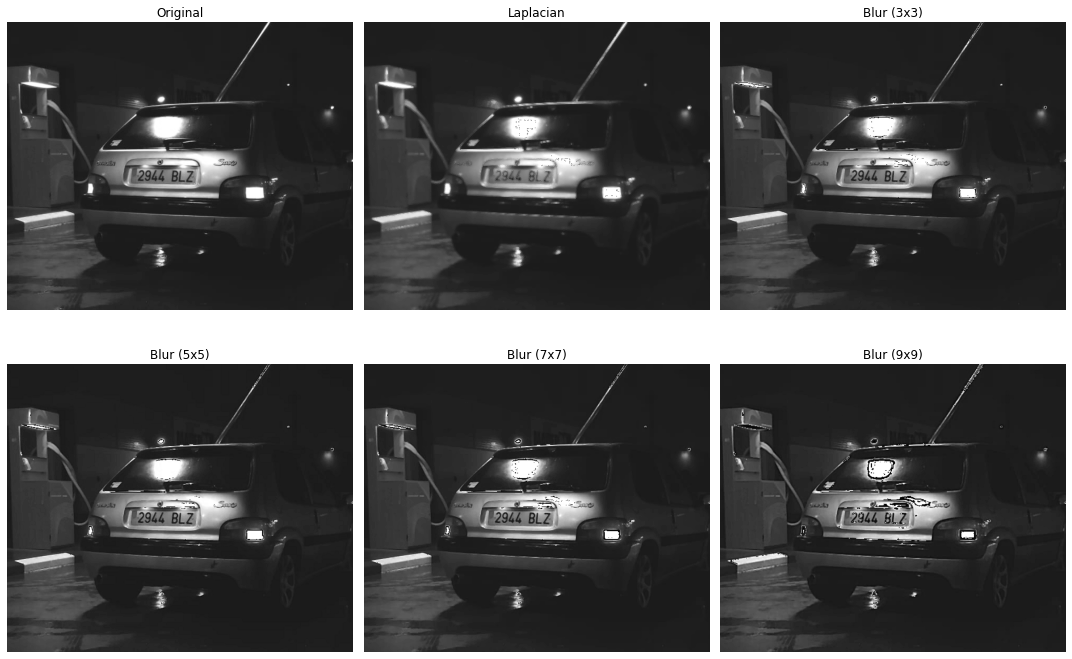


-------------------------------------
#    Car | A: 2
-------------------------------------


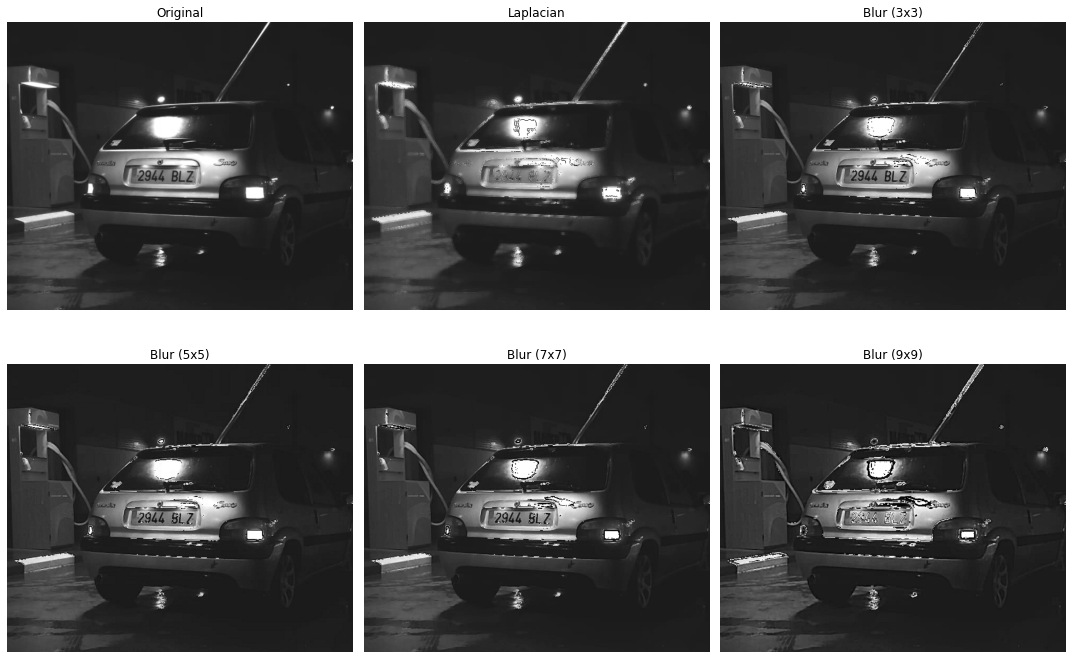


-------------------------------------
#    Moon | A: -2
-------------------------------------


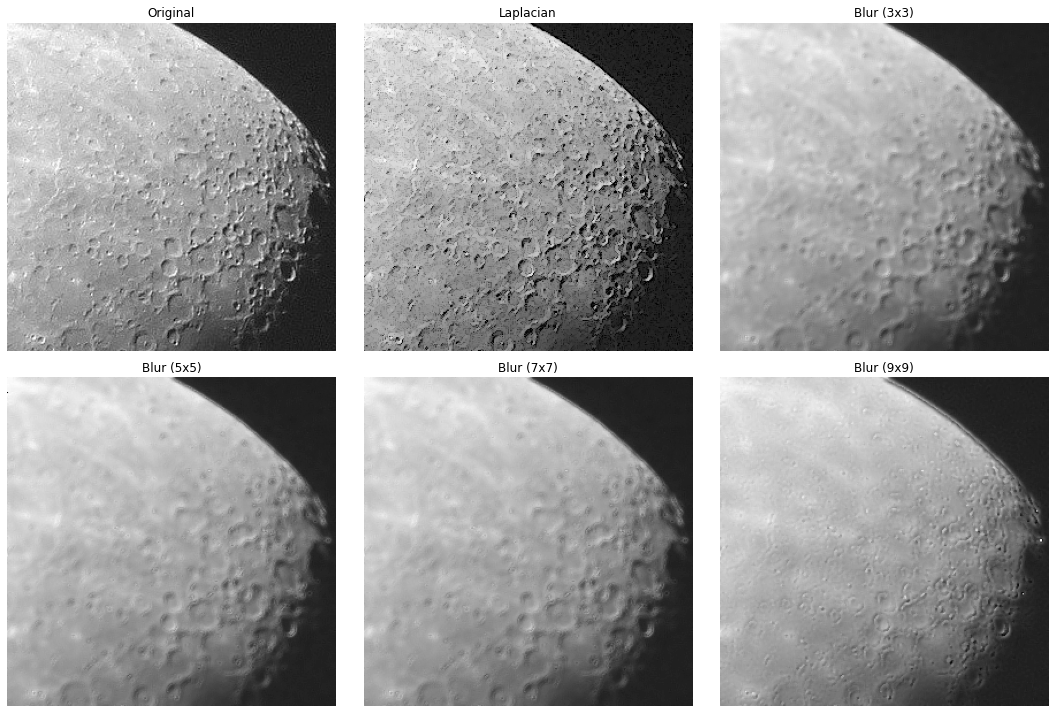


-------------------------------------
#    Moon | A: -1
-------------------------------------


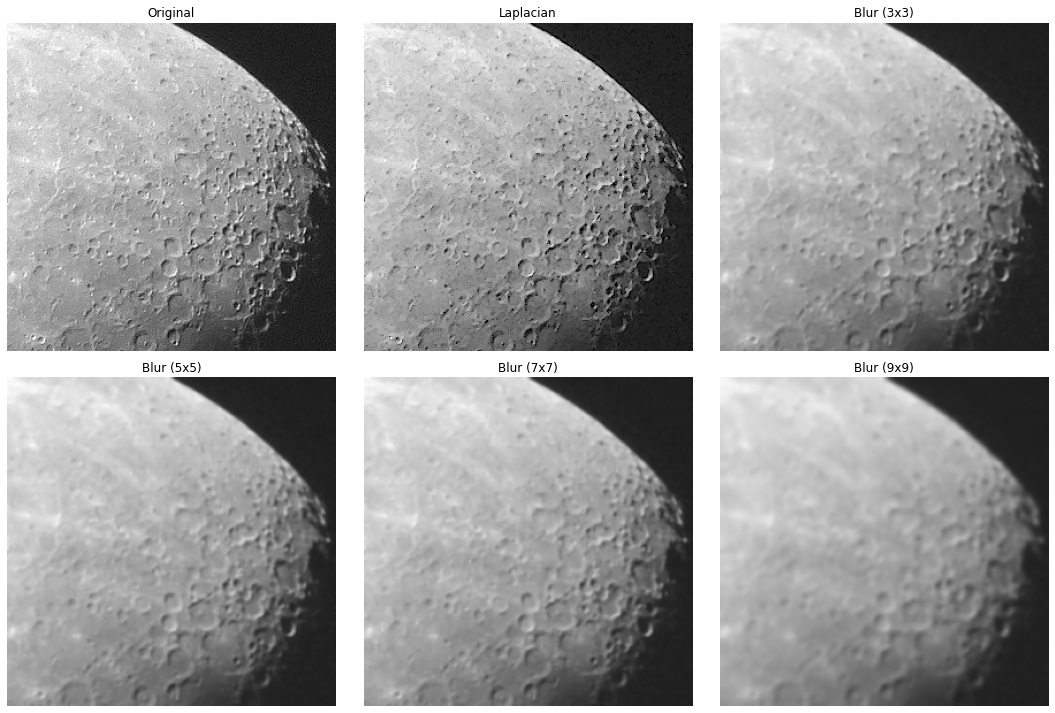


-------------------------------------
#    Moon | A: 1
-------------------------------------


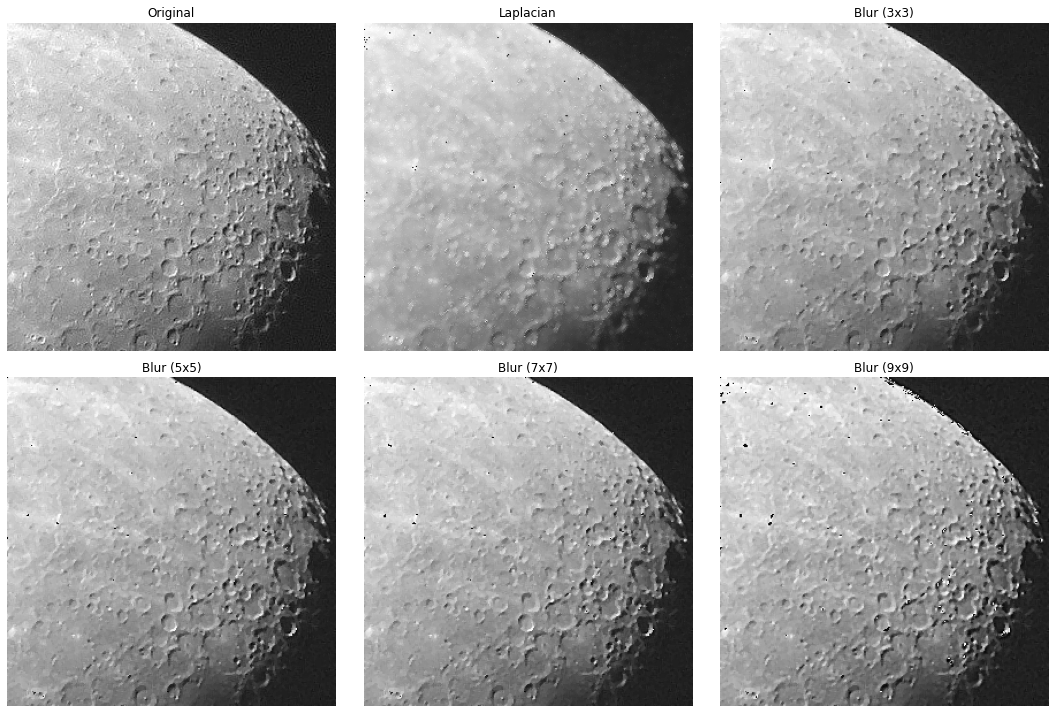


-------------------------------------
#    Moon | A: 2
-------------------------------------


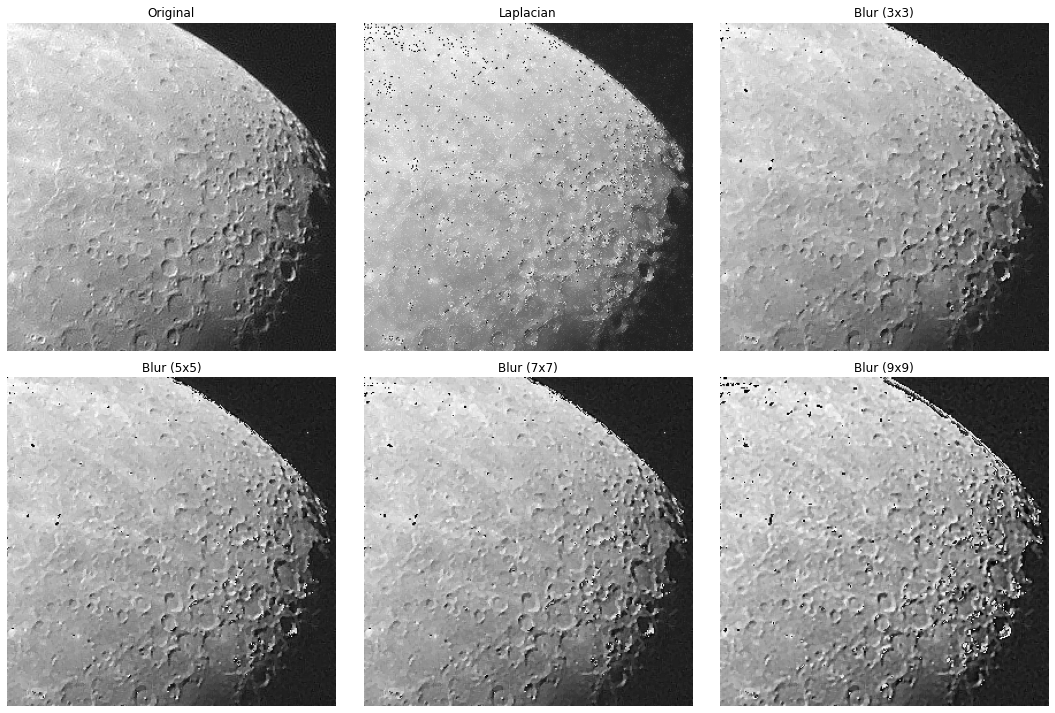

In [53]:
img_arr = [car, moon]
img_caption = ["Car", "Moon"]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        print("\n-------------------------------------")
        print("#   ", img_caption[i], "| A:", A)
        print("-------------------------------------")

        fig = plt.figure(figsize=(15, 10))
        plot_frame(2, 3, 0, img_arr[i], "Original")

        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        plot_frame(2, 3, 1, tmp_img, "Laplacian")

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            plot_frame(2, 3, 2+j, tmp_img, "Blur (" + str(kernel_size) + "x" + str(kernel_size) + ")")
            j += 1
        
        fig.tight_layout()
        plt.show()

In [54]:
your_observation = """
From the above sharpening enhancement methods:

For Laplacian unsharp masking
1. We can clearly see that for the choice of our laplacian operator, the value of -ve A provides more sharp images than the +ve values, which blurs the
images, which is theoretically true also.
2. As we increase the -ve value of A we get more sharper edges but at the same time some distortion increase also due to presence of noise.

For unsharp masking with gaussian blur
1. With gaussian blur the method is highboosting the images, and for -ve values of A the images get blurred and for +ve A values the image get sharpened
but it also highboosts the noise present in the image.
2. With the increase in the kernel size the effect of blurring and sharpening also increases which also increases the effect of noise in the image.

For both the methods laplacian provides much better results and have less effect of noise present in original image.
"""

print(your_observation)


From the above sharpening enhancement methods:

For Laplacian unsharp masking
1. We can clearly see that for the choice of our laplacian operator, the value of -ve A provides more sharp images than the +ve values, which blurs the
images, which is theoretically true also.
2. As we increase the -ve value of A we get more sharper edges but at the same time some distortion increase also due to presence of noise.

For unsharp masking with gaussian blur
1. With gaussian blur the method is highboosting the images, and for -ve values of A the images get blurred and for +ve A values the image get sharpened
but it also highboosts the noise present in the image.
2. With the increase in the kernel size the effect of blurring and sharpening also increases which also increases the effect of noise in the image.

For both the methods laplacian provides much better results and have less effect of noise present in original image.



In [55]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

lap_img = []
blur_img = []

img_arr = [car, moon]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        lap_img.append(tmp_img)

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(img_arr[i], blur_kernel=kernel_size, A=A)
            blur_img.append(tmp_img)
            j += 1

gen_imgs = lap_img+blur_img
task3_submission = np.array(gen_imgs)